<a href="https://colab.research.google.com/github/viswambhar-yasa/Boston_Housing_price/blob/main/Boston_houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of House prices in Boston based on data from 1970.

In [ ]:
# importing important libraries 
import tensorflow as tf
import tensorflow.keras as tfk
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print("TensorFlow Version")
tf.__version__

TensorFlow Version


'2.5.0'

This is a dataset taken from the StatLib library which is maintained at `Carnegie Mellon University`.

Samples contain `13 attributes` of houses at different locations around the Boston suburbs in the late `1970s`. Targets are the median values of the houses at a location (in k$).

In [ ]:
#importing datasets
(X_tr,Y_tr),(X_test,Y_test)=tfk.datasets.boston_housing.load_data(path='boston_housing.csv',test_split=0.25)

In [ ]:
(m,n)=X_tr.shape
print('Number of features :',n)

Number of features : 13


In [ ]:
print('sample data')
X_tr[0,:]

sample data


array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

Data preprocessing
1. Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
normalization=MinMaxScaler()
X_norm_tr=normalization.fit_transform(X_tr)
X_norm_test=normalization.fit_transform(X_test)
X_norm_tr[0,:]

array([0.01378163, 0.        , 0.28152493, 0.        , 0.31481481,
       0.49980635, 0.91452111, 0.29719123, 0.13043478, 0.22753346,
       0.89361702, 1.        , 0.51422518])

# Creating deep NN model

In [ ]:
housing_model=tfk.Sequential([
                              tfk.layers.Dense(1,input_shape=[13,],activation='relu',name='hidden_layer_1'),
                              tfk.layers.Dense(1,input_shape=[1,],name="ouput_layer")
],name='Boston_housing_model')

housing_model.compile(loss=tfk.losses.mae,
                      optimizer=tfk.optimizers.Adam(learning_rate=0.01))

housing_model_hist=housing_model.fit(X_norm_tr,Y_tr,epochs=150,verbose=0)

In [ ]:
housing_model.evaluate(X_norm_test,Y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.3021


3.302088975906372

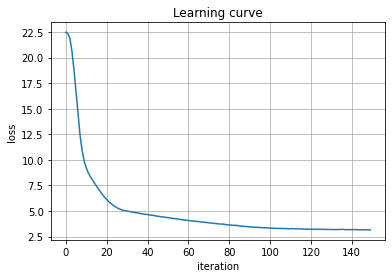

In [ ]:
plt.plot(housing_model_hist.epoch,housing_model_hist.history["loss"])
plt.title('Learning curve')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid()

In [ ]:
Y_predict=housing_model.predict(X_norm_test)
print('Predicted price',Y_predict[0,0])
print('Actual price',Y_test[0])

Predicted price 29.568163
Actual price 29.8


Improving the model by adding more hidden layer and unit

In [ ]:
housing_model_1=tfk.Sequential([
                              tfk.layers.Dense(10,input_shape=[13,],activation='relu',name='hidden_layer_1'),
                              tfk.layers.Dense(5,input_shape=[10,],activation='relu',name='hidden_layer_2'),
                              tfk.layers.Dense(1,input_shape=[5,],name="ouput_layer")
],name='Boston_housing_model_1')

housing_model_1.compile(loss=tfk.losses.mae,
                      optimizer=tfk.optimizers.Adam(learning_rate=0.001))

housing_model_hist_1=housing_model_1.fit(X_norm_tr,Y_tr,epochs=250,verbose=0)

In [ ]:
housing_model_1.evaluate(X_norm_test,Y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.2228


3.2227983474731445

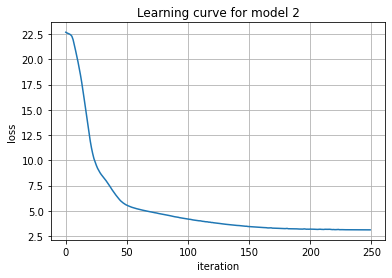

In [ ]:
plt.plot(housing_model_hist_1.epoch,housing_model_hist_1.history["loss"])
plt.title('Learning curve for model 2')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid()

In [ ]:
print('For Deep NN')
Y_predict=housing_model_1.predict(X_norm_test)
print('Predicted price',Y_predict[0,0])
print('Actual price',Y_test[0])

For Deep NN
Predicted price 29.98348
Actual price 29.8


In [ ]:
housing_model_1.summary()

Model: "Boston_housing_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 10)                140       
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 5)                 55        
_________________________________________________________________
ouput_layer (Dense)          (None, 1)                 6         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
housing_model_1.save(filepath='Boston_house_prediction_model.h5')